**import Librarys**

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Load other modules
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split #division de dataset
from sklearn.metrics import classification_report, confusion_matrix #pour generer la matrice de confusion
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Random forest for classification

In [43]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')

In [44]:
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [45]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [46]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [47]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [48]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
pred=rf.predict(X_test)

In [52]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,pred))

[[2867   29    0    0]
 [  33 2792   36    0]
 [   0   51 2703   26]
 [   0    0   14 2761]]


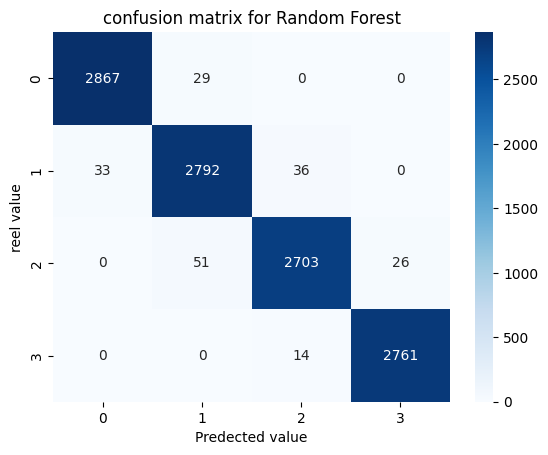

In [55]:
cm = confusion_matrix(y_test,pred)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for Random Forest')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [56]:
print ("Classification Report")
print(classification_report(y_test,pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2896
           1       0.97      0.98      0.97      2861
           2       0.98      0.97      0.98      2780
           3       0.99      0.99      0.99      2775

    accuracy                           0.98     11312
   macro avg       0.98      0.98      0.98     11312
weighted avg       0.98      0.98      0.98     11312



**SVM for classification**

In [59]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [60]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [61]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [62]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [63]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Create a SVM object
svm = SVC(kernel='rbf', C=1, gamma='scale',random_state=42)
# Fit the model on the training data
svm.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [70]:
pred_svm=svm.predict(X_test)

In [71]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,pred_svm))

[[1793  654  210  239]
 [ 439  788  640  994]
 [  59  169  396 2156]
 [   3   14   66 2692]]


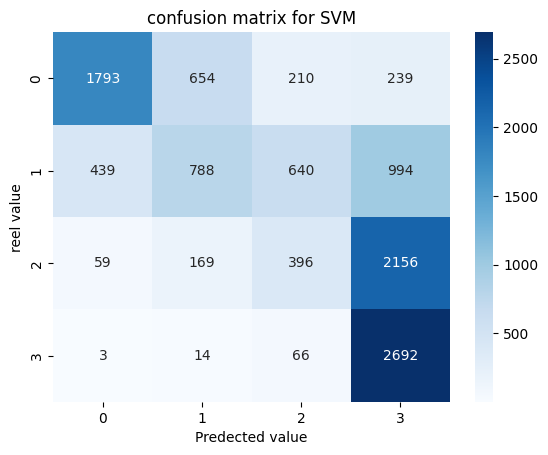

In [72]:
cm = confusion_matrix(y_test,pred_svm)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for SVM')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [73]:
print ("Classification Report")
print(classification_report(y_test,pred_svm))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      2896
           1       0.48      0.28      0.35      2861
           2       0.30      0.14      0.19      2780
           3       0.44      0.97      0.61      2775

    accuracy                           0.50     11312
   macro avg       0.50      0.50      0.46     11312
weighted avg       0.51      0.50      0.46     11312



**KNN for classification**

In [74]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [75]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [76]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [77]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [78]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Create a KNN object
knn = KNeighborsClassifier()
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
pred_knn=knn.predict(X_test)

In [81]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,pred_knn))

[[2700  183    4    9]
 [ 286 2234  337    4]
 [  12  323 1972  473]
 [   5    2   67 2701]]


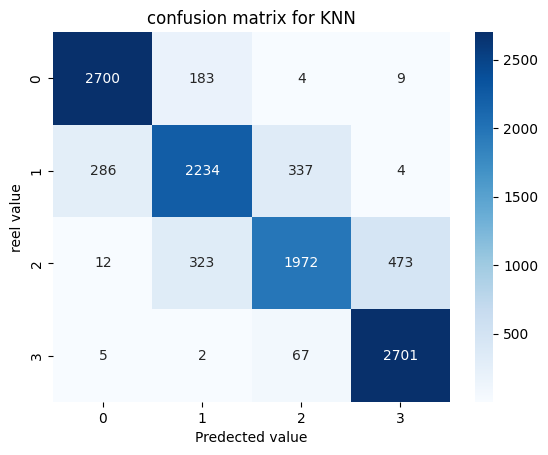

In [83]:
cm = confusion_matrix(y_test,pred_knn)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for KNN')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [84]:
print ("Classification Report")
print(classification_report(y_test,pred_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2896
           1       0.81      0.78      0.80      2861
           2       0.83      0.71      0.76      2780
           3       0.85      0.97      0.91      2775

    accuracy                           0.85     11312
   macro avg       0.85      0.85      0.85     11312
weighted avg       0.85      0.85      0.85     11312



**MLP with 2 layers for classification**

In [85]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [86]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [87]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [88]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [89]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Créer un objet MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,50), max_iter=2000, random_state=42)
# Entraîner le modèle sur les données d'entraînement
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 50), max_iter=2000, random_state=42)

In [91]:
# Faire des prédictions sur les données de test
y_pred_mlp = mlp.predict(X_test)

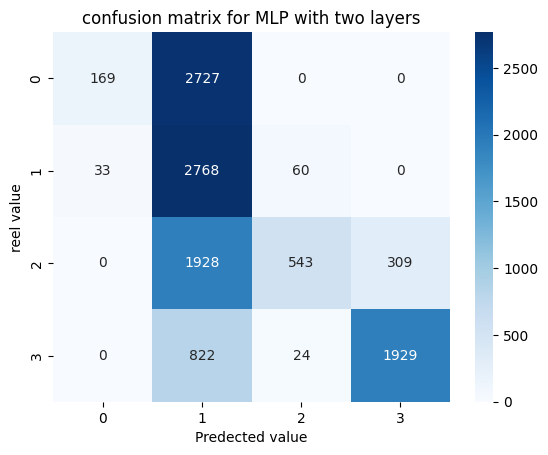

In [92]:
cm = confusion_matrix(y_test,y_pred_mlp)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for MLP with two layers')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [93]:
print ("Classification Report")
print(classification_report(y_test,y_pred_mlp))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.06      0.11      2896
           1       0.34      0.97      0.50      2861
           2       0.87      0.20      0.32      2780
           3       0.86      0.70      0.77      2775

    accuracy                           0.48     11312
   macro avg       0.73      0.48      0.42     11312
weighted avg       0.72      0.48      0.42     11312



**Decision tree for classification**

In [125]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [126]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [127]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [128]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [131]:
# Faire des prédictions sur les données de test
y_pred_dt = dt.predict(X_test)

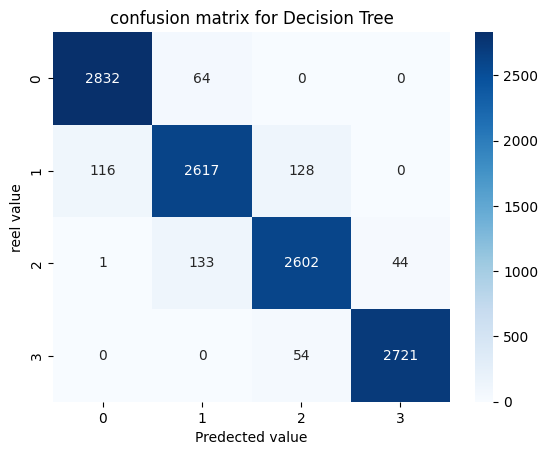

In [132]:
cm = confusion_matrix(y_test,y_pred_dt)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for Decision Tree')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [133]:
print ("Classification Report")
print(classification_report(y_test,y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2896
           1       0.93      0.91      0.92      2861
           2       0.93      0.94      0.94      2780
           3       0.98      0.98      0.98      2775

    accuracy                           0.95     11312
   macro avg       0.95      0.95      0.95     11312
weighted avg       0.95      0.95      0.95     11312



**Logistic Regression**

In [134]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [135]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [136]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [137]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [138]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Initialize the logistic regression model
Lg = LogisticRegression(random_state=42)
# Train the model
Lg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [146]:
# Faire des prédictions sur les données de test
y_pred_Lg = Lg.predict(X_test)

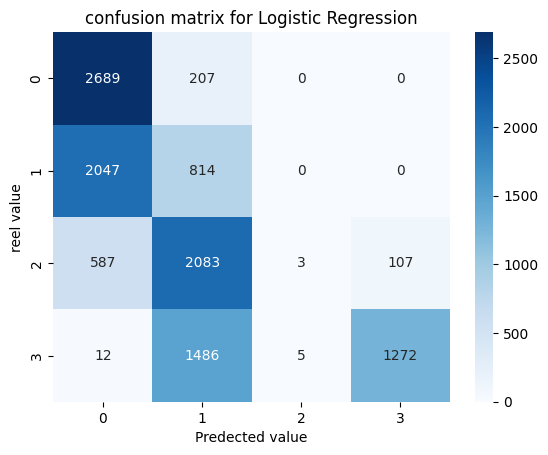

In [147]:
cm = confusion_matrix(y_test,y_pred_Lg)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for Logistic Regression')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [148]:
print ("Classification Report")
print(classification_report(y_test,y_pred_Lg))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.93      0.65      2896
           1       0.18      0.28      0.22      2861
           2       0.38      0.00      0.00      2780
           3       0.92      0.46      0.61      2775

    accuracy                           0.42     11312
   macro avg       0.49      0.42      0.37     11312
weighted avg       0.49      0.42      0.37     11312



**XGBoost for classification**

In [171]:
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
df=df[['turbidity','ss', 'dissolved_oxygen','bod5','cod','t_carbon','t_phosphorus','t_nitrogen','faecal_coliform','wqi clf']]

In [172]:
# Charger les données
data = df
cols_to_drop=["wqi clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["wqi clf"].values

In [173]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [174]:
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 14139, 1: 9063, 0: 5208, 3: 2118})

After SMOTE Counter({1: 14139, 0: 14139, 2: 14139, 3: 14139})


In [175]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Initialize the XGBoost model
model = xgb.XGBClassifier()
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [177]:
# Faire des prédictions sur les données de test
y_pred_xgb = model.predict(X_test)

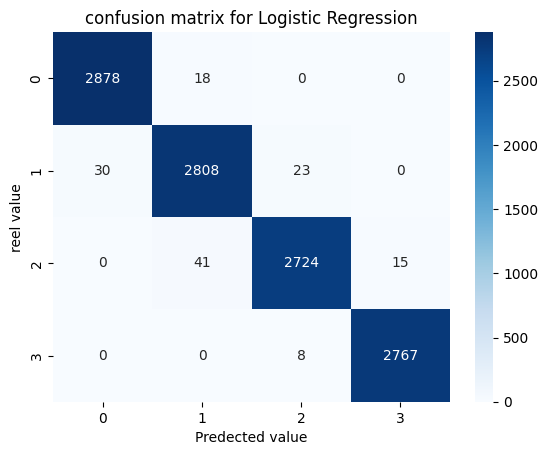

In [178]:
cm = confusion_matrix(y_test,y_pred_xgb)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('confusion matrix for Logistic Regression')
plt.xlabel('Predected value')
plt.ylabel('reel value')
plt.show()


In [179]:
print ("Classification Report")
print(classification_report(y_test,y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2896
           1       0.98      0.98      0.98      2861
           2       0.99      0.98      0.98      2780
           3       0.99      1.00      1.00      2775

    accuracy                           0.99     11312
   macro avg       0.99      0.99      0.99     11312
weighted avg       0.99      0.99      0.99     11312

